#Load Data

In [22]:
import pandas as pd
df = pd.read_csv("/content/education_career_success.csv")
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S001,22,Male,3.8,1450,3.6,Computer Science,3,7,2,8,7,3,85000,8,2,Mid,7,No
1,S002,24,Female,3.6,1380,3.4,Business,2,5,3,7,6,2,65000,7,3,Mid,6,No
2,S003,21,Male,3.9,1520,3.8,Engineering,4,9,4,9,8,4,120000,9,1,Senior,6,No
3,S004,23,Female,3.5,1300,3.2,Psychology,1,3,1,6,5,1,48000,6,4,Entry,8,No
4,S005,25,Male,3.7,1420,3.5,Medicine,2,6,2,8,7,3,95000,8,2,Mid,5,No


# Structure of Data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             400 non-null    object 
 1   Age                    400 non-null    int64  
 2   Gender                 400 non-null    object 
 3   High_School_GPA        400 non-null    float64
 4   SAT_Score              400 non-null    int64  
 5   University_GPA         400 non-null    float64
 6   Field_of_Study         400 non-null    object 
 7   Internships_Completed  400 non-null    int64  
 8   Projects_Completed     400 non-null    int64  
 9   Certifications         400 non-null    int64  
 10  Soft_Skills_Score      400 non-null    int64  
 11  Networking_Score       400 non-null    int64  
 12  Job_Offers             400 non-null    int64  
 13  Starting_Salary        400 non-null    int64  
 14  Career_Satisfaction    400 non-null    int64  
 15  Years_

In [24]:
df.describe()

,Age,High_School_GPA,SAT_Score,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,23.000000,3.62425,1388.600000,3.441000,2.500000,6.23500,2.6250,7.932500,6.932500,2.740000,87562.500000,7.792500,2.915000,6.412500
std,1.415985,0.18795,114.311889,0.285522,1.061988,1.90232,1.2702,1.314253,1.318062,1.355357,29685.419892,1.372645,1.340622,0.929788
min,21.000000,3.20000,1160.000000,2.800000,0.000000,2.00000,0.0000,5.000000,4.000000,0.000000,31000.000000,5.000000,1.000000,5.000000
25%,22.000000,3.50000,1300.000000,3.200000,2.000000,5.00000,2.0000,7.000000,6.000000,2.000000,68000.000000,7.000000,2.000000,6.000000
50%,23.000000,3.60000,1380.000000,3.450000,3.000000,6.00000,3.0000,8.000000,7.000000,3.000000,84000.000000,8.000000,3.000000,6.000000
75%,24.000000,3.80000,1480.000000,3.700000,3.000000,8.00000,3.0000,9.000000,8.000000,4.000000,105250.000000,9.000000,4.000000,7.000000
max,25.000000,3.90000,1580.000000,4.000000,4.000000,9.00000,5.0000,10.000000,9.000000,5.000000,152000.000000,10.000000,5.000000,9.000000


# Feature Engineering

In [25]:

# 1. Academic_Life (combined GPA)
df["Academic_Life"] = (df["High_School_GPA"] + df["University_GPA"]) / 2

# 2. Experience_Score (internships + projects + certifications)
df["Experience_Score"] = (
    df["Internships_Completed"] +
    df["Projects_Completed"] +
    df["Certifications"]
)

# 3. Stress_Level (reverse of Work-Life Balance)
df["Stress_Level"] = 10 - df["Work_Life_Balance"]

# Show the new columns
df[["Academic_Life", "Experience_Score", "Stress_Level"]].head()


,Academic_Life,Experience_Score,Stress_Level
0,3.70,12,3
1,3.50,10,4
2,3.85,17,4
3,3.35,5,2
4,3.60,10,5


In [26]:
print("Numerical Summary Statistics")
df.describe()

Numerical Summary Statistics


,Age,High_School_GPA,SAT_Score,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance,Academic_Life,Experience_Score,Stress_Level
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,23.000000,3.62425,1388.600000,3.441000,2.500000,6.23500,2.6250,7.932500,6.932500,2.740000,87562.500000,7.792500,2.915000,6.412500,3.532625,11.360000,3.587500
std,1.415985,0.18795,114.311889,0.285522,1.061988,1.90232,1.2702,1.314253,1.318062,1.355357,29685.419892,1.372645,1.340622,0.929788,0.235782,4.174802,0.929788
min,21.000000,3.20000,1160.000000,2.800000,0.000000,2.00000,0.0000,5.000000,4.000000,0.000000,31000.000000,5.000000,1.000000,5.000000,3.000000,2.000000,1.000000
25%,22.000000,3.50000,1300.000000,3.200000,2.000000,5.00000,2.0000,7.000000,6.000000,2.000000,68000.000000,7.000000,2.000000,6.000000,3.350000,9.000000,3.000000
50%,23.000000,3.60000,1380.000000,3.450000,3.000000,6.00000,3.0000,8.000000,7.000000,3.000000,84000.000000,8.000000,3.000000,6.000000,3.525000,12.000000,4.000000
75%,24.000000,3.80000,1480.000000,3.700000,3.000000,8.00000,3.0000,9.000000,8.000000,4.000000,105250.000000,9.000000,4.000000,7.000000,3.750000,14.000000,4.000000
max,25.000000,3.90000,1580.000000,4.000000,4.000000,9.00000,5.0000,10.000000,9.000000,5.000000,152000.000000,10.000000,5.000000,9.000000,3.950000,18.000000,5.000000


In [27]:
print("Mode:")
display(df.mode().head())


Mode:


,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,...,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship,Academic_Life,Experience_Score,Stress_Level
0,S001,21.0,Female,3.6,1380.0,3.5,Business,3.0,7.0,3.0,...,2.0,88000.0,7.0,2.0,Mid,6.0,No,3.5,13.0,4.0
1,S002,22.0,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S003,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S004,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S005,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print("Frequency Counts")

# Gender distribution
if "Gender" in df.columns:
    print(df["Gender"].value_counts())

print("\n")

# Field of Study distribution
if "Field_of_Study" in df.columns:
    print(df["Field_of_Study"].value_counts())


Frequency Counts
Gender
Male      200
Female    200
Name: count, dtype: int64


Field_of_Study
Business            72
Engineering         58
Psychology          55
Computer Science    49
Law                 44
Marketing           44
Medicine            35
Arts                32
Finance              5
Education            3
Nursing              3
Name: count, dtype: int64


# Visualizations

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

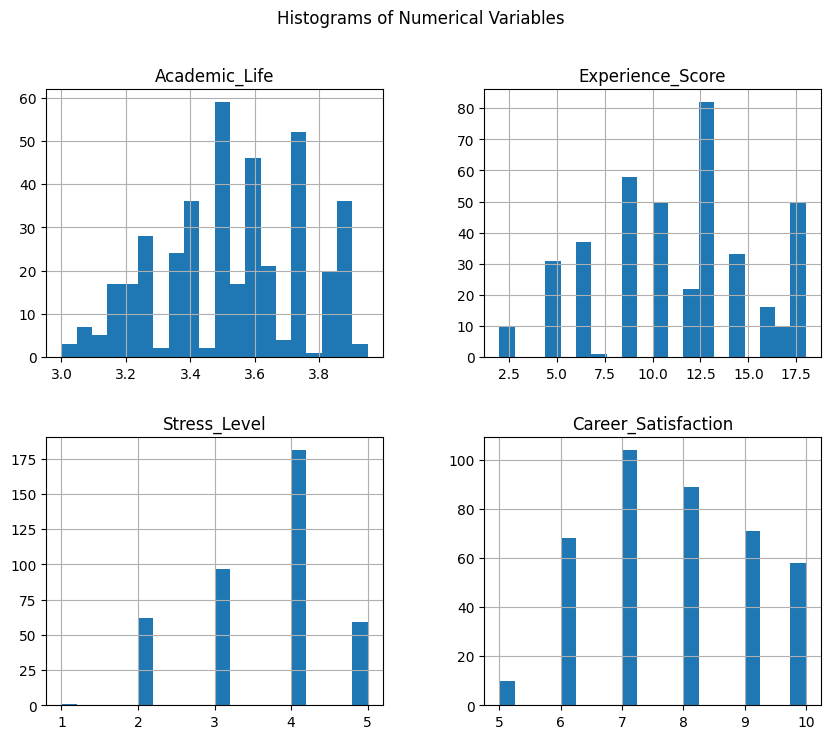

In [33]:
numeric_cols = ["Academic_Life", "Experience_Score", "Stress_Level", "Career_Satisfaction"]

df[numeric_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle("Histograms of Numerical Variables")
plt.show()


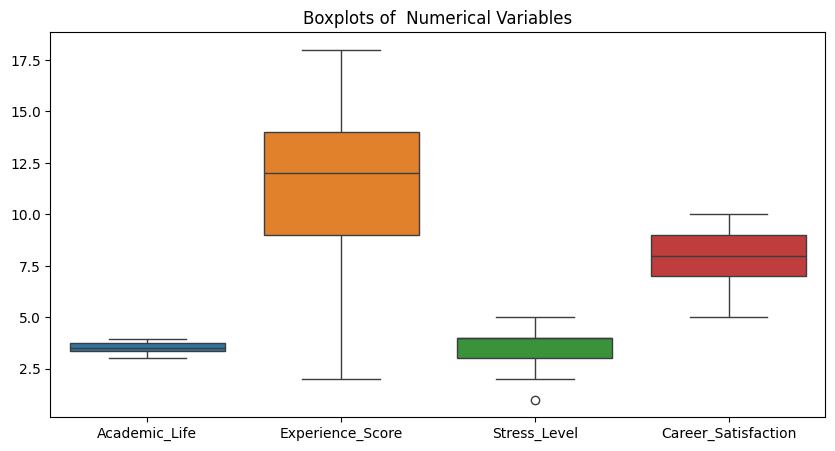

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of  Numerical Variables")
plt.show()


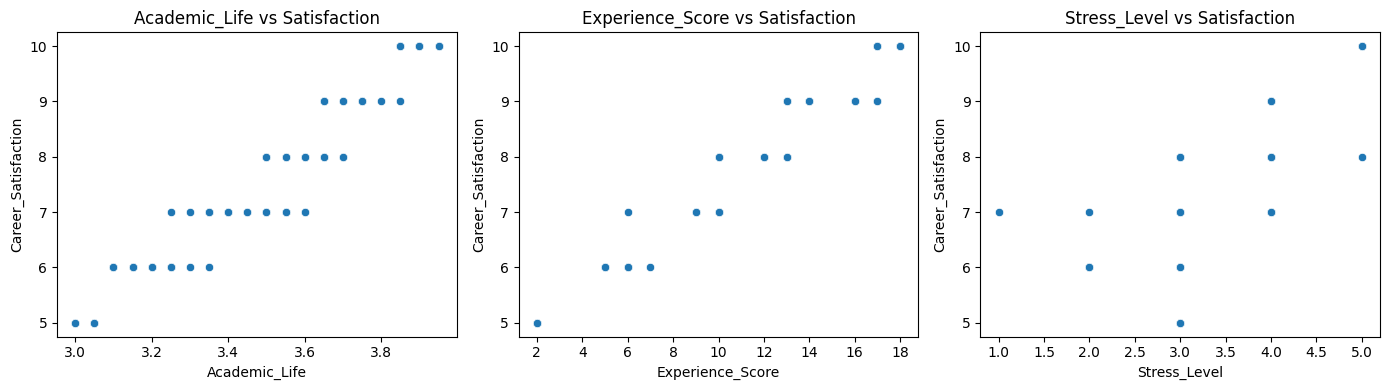

In [53]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df["Academic_Life"], y=df["Career_Satisfaction"])
plt.title("Academic_Life vs Satisfaction")

plt.subplot(1, 3, 2)
sns.scatterplot(x=df["Experience_Score"], y=df["Career_Satisfaction"])
plt.title("Experience_Score vs Satisfaction")

plt.subplot(1, 3, 3)
sns.scatterplot(x=df["Stress_Level"], y=df["Career_Satisfaction"])
plt.title("Stress_Level vs Satisfaction")

plt.tight_layout()
plt.show()


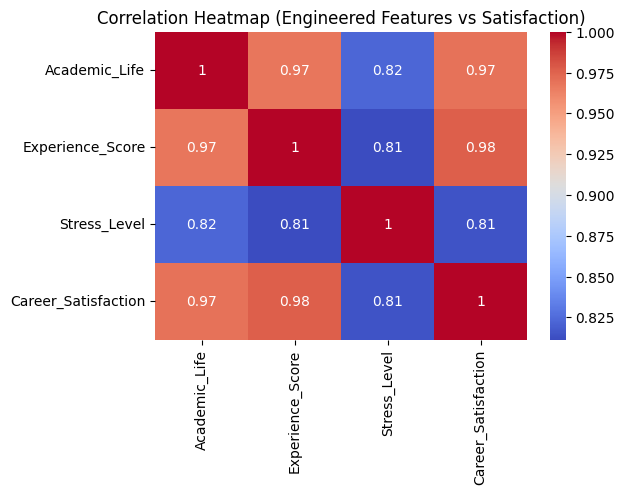

In [47]:
# I only include feature-engineered variables and target
selected_cols = ["Academic_Life", "Experience_Score", "Stress_Level", "Career_Satisfaction"]

plt.figure(figsize=(6, 4))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Engineered Features vs Satisfaction)")
plt.show()


# Hypothesis Testing

## Stress Level vs Career Satisfaction

### H₀: No relationship between Stress Level and Career Satisfaction

### H₁: There is a significant relationship Stress Level and Career Satisfaction

In [48]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["Stress_Level"], df["Career_Satisfaction"])

print("Hypothesis 1: Stress vs Satisfaction")
print("Correlation:", corr)
print("p-value:", p_value)


Hypothesis 1: Stress vs Satisfaction
Correlation: 0.814487861058889
p-value: 3.876551123052493e-96


#### The Pearson correlation analysis shows a strong positive relationship between Stress Level and Career Satisfaction (r ≈ 0.81).

#### We reject H₀ because p-value < 0.05. This means that Stress Level is significantly associated with Career Satisfaction.

##  Experience Score vs Starting Salary

### H₀: There is no significant relationship between Experience Score and Starting Salary.

### H₁: There is a significant  relationship between Experience Score and Starting Salary.



In [54]:
corr, p_value = pearsonr(df["Experience_Score"], df["Starting_Salary"])

print("Hypothesis 3: Experience vs Salary")
print("Correlation:", corr)
print("p-value:", p_value)


Hypothesis 3: Experience vs Salary
Correlation: 0.962579750332371
p-value: 8.690962195958949e-228


#### The Pearson correlation test reveals a very strong positive relationship between Experience Score and Starting Salary (r ≈ 0.96).

#### We reject H₀ because p-value < 0.05.